# Fish AI

Real time fish counter and identification

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
from darkflow.net.build import TFNet

# %config InlineBackend.figure_format = 'svg'

In [21]:
options = {
    'model': 'cfg/tiny-yolo-voc-3c.cfg',
#     'load': 'bin/tiny-yolo-voc.weights',
    'load': 600,
    'thresh': 0.2,
    'gpu': 0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 0.0001087188720703125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13,

In [32]:
!ls training/images/fish_vid_03*.jpg

training/images/fish_vid_03_0000.jpg  training/images/fish_vid_03_0048.jpg
training/images/fish_vid_03_0002.jpg  training/images/fish_vid_03_0050.jpg
training/images/fish_vid_03_0004.jpg  training/images/fish_vid_03_0052.jpg
training/images/fish_vid_03_0006.jpg  training/images/fish_vid_03_0054.jpg
training/images/fish_vid_03_0008.jpg  training/images/fish_vid_03_0056.jpg
training/images/fish_vid_03_0010.jpg  training/images/fish_vid_03_0058.jpg
training/images/fish_vid_03_0012.jpg  training/images/fish_vid_03_0060.jpg
training/images/fish_vid_03_0014.jpg  training/images/fish_vid_03_0062.jpg
training/images/fish_vid_03_0016.jpg  training/images/fish_vid_03_0064.jpg
training/images/fish_vid_03_0018.jpg  training/images/fish_vid_03_0066.jpg
training/images/fish_vid_03_0020.jpg  training/images/fish_vid_03_0068.jpg
training/images/fish_vid_03_0022.jpg  training/images/fish_vid_03_0070.jpg
training/images/fish_vid_03_0024.jpg  training/images/fish_vid_03_0072.jpg
training/images/fish_vid_

[{'label': 'saddle butterfly fish',
  'confidence': 0.6501352,
  'topleft': {'x': 1217, 'y': 467},
  'bottomright': {'x': 1365, 'y': 588}},
 {'label': 'saddle butterfly fish',
  'confidence': 0.9458675,
  'topleft': {'x': 287, 'y': 546},
  'bottomright': {'x': 454, 'y': 707}},
 {'label': 'saddle butterfly fish',
  'confidence': 0.92135763,
  'topleft': {'x': 1188, 'y': 551},
  'bottomright': {'x': 1347, 'y': 654}},
 {'label': 'damselfish',
  'confidence': 0.6032615,
  'topleft': {'x': 811, 'y': 169},
  'bottomright': {'x': 898, 'y': 240}},
 {'label': 'damselfish',
  'confidence': 0.51985407,
  'topleft': {'x': 911, 'y': 161},
  'bottomright': {'x': 982, 'y': 229}},
 {'label': 'damselfish',
  'confidence': 0.5129287,
  'topleft': {'x': 373, 'y': 243},
  'bottomright': {'x': 460, 'y': 332}},
 {'label': 'damselfish',
  'confidence': 0.71157104,
  'topleft': {'x': 803, 'y': 232},
  'bottomright': {'x': 885, 'y': 291}},
 {'label': 'damselfish',
  'confidence': 0.59772336,
  'topleft': {'x':

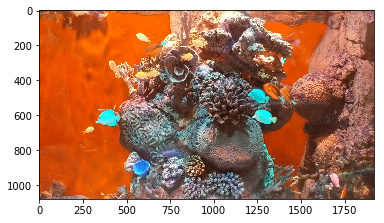

In [36]:
img = cv2.imread('training/images/fish_vid_03_0010.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
result = tfnet.return_predict(img)
result

In [37]:
# tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
# br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
# label = result[0]['label']

# tl, br, label

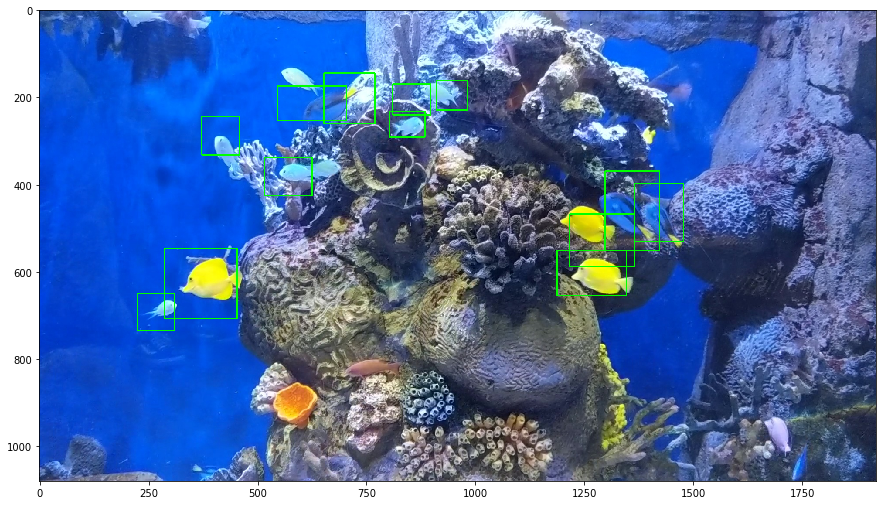

In [38]:
img2 = img

for i in range(len(result)):
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
    
    img2 = cv2.rectangle(img2, tl, br, (0, 255, 0), 2)
    
#     img2 = cv2.putText(img2, label, tl, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
#                    fontScale = 0.1, color = (0, 255, 0), thickness=8)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(img2)
plt.show()